In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy
import scipy
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import os
import json
import subprocess
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
#
# system_name='mazama'
system_name='SERC'
groups_fname=None

#groups_fname='mazama_groups.json'
#
#data_file_name='data/sacct_mazama_out_2.out'
#data_file_name = 'data/mazama_usage_20200506_tool8.out'
#data_file_name = 'data/sacct_mazama_out_20200506a.out'
#data_file_name = 'data/sacct_serc_20200622.out'
#data_file_name = 'data/sacct_serc_20200622.out'
data_file_name = 'data/sacct_owners_out_3500489.out'
#
# as small(ish) test data set:
#data_file_name = 'data/sacct_mazama_20200701_20200718.out'

#data_file_name = 'data/serc_sacct_2020_06_29.out'

output_path = 'output/{}_HPC_analytics'.format(system_name)
#output_path = 'output/HPC_analytics'

In [ ]:
# #ls data
# with open(data_file_name, 'r') as fin:
#     with open('data/test_data.out', 'w') as fout:
#         for k,rw in enumerate(fin):
#             fout.write(rw)
#             if k>=1000:
#                 break
# #
#data_file_name='data/test_data.out'

In [4]:
load_pickle = True
dump_pickle = True
max_rows = None
#max_rows = 1000
n_cpu=4
pkl_name = "{}.pkl".format(os.path.splitext(data_file_name)[0])
#
if load_pickle:
    with open(pkl_name, 'rb') as fin:
        sacct_mazama=pickle.load(fin)
    #
else:
    sacct_mazama = hpc_lib.SACCT_data_handler(data_file_name=data_file_name,
                    max_rows=max_rows, n_cpu=n_cpu, verbose=1)
    #
    if dump_pickle:
        with open(pkl_name, 'wb') as fout:
                #out_pkl = pickle.dump(sacct_demo.jobs_summary, fout)
                out_pkl = pickle.dump(sacct_mazama, fout)
#

In [5]:
print("States: ", [s for s in set(sacct_mazama.jobs_summary['State']) if not "CANCELLED" in s] )
#
#dT = .5
ix_pr  = sacct_mazama.jobs_summary['State']=='PREEMPTED'
ix_npr = sacct_mazama.jobs_summary['State']!='PREEMPTED'
ix_cpl = sacct_mazama.jobs_summary['State']=='COMPLETED'
#
#
N_pr  = len(sacct_mazama.jobs_summary[ix_pr])
N_npr = len(sacct_mazama.jobs_summary[ix_npr])
print('*** preempted: {} vs {}, a/b={}'.format(N_pr, N_npr, N_pr/N_npr))


States:  ['PREEMPTED', 'PENDING', 'NODE_FAIL', 'COMPLETED', 'REQUEUED', 'RUNNING', 'OUT_OF_MEMORY', 'TIMEOUT', 'FAILED']
*** preempted: 80966 vs 3920991, a/b=0.020649371549182338


In [6]:
print('** ', sacct_mazama.data.dtype.names)
#print('** ', [s for s in set(sacct_mazama.data['State']) if 'PR' in s])
#
preempted = (sacct_mazama.jobs_summary[['JobID', 'NCPUS', 'NNodes', 'Submit', 'Start',
                              'End', 'Elapsed']][ix_pr])
preempted = preempted[numpy.argsort(preempted['JobID'])]
#
print('*** len: ', len(preempted))

#jsp = sacct_mazama.

#print('** ', preempted[numpy.argsort(preempted['JobID'])][0:10])
#print('** ', preempted[0:10])
#pr_working = preempted[['JobID', 'NCPUS', 'NNodes', 'Submit', 'Start',
#                              'End', 'Elapsed']]
#
compl = sacct_mazama.jobs_summary[['JobID', 'NCPUS', 'NNodes', 'Submit', 'Start',
                              'End', 'Elapsed']][ix_npr]

#compl = sacct_mazama.jobs_summary[['JobID', 'NCPUS', 'NNodes', 'Submit', 'Start',
#                              'End', 'Elapsed']][sacct_mazama.jobs_summary['State']!='PREEMPTED']

print(preempted[0:10])
print('** ', preempted.dtype.names)
#
print('** len(completed): ', len(compl))



**  ('index', 'User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqGRES', 'AllocGRES', 'ReqTRES', 'AllocTRES', 'JobID_parent')
*** len:  80966
[('1002304', 1, 1, 737567.485     , 737567.49084491, 737567.50112269, 0.01021991)
 ('1003246_420', 1, 1, 737567.50872685, 737567.51943287, 737567.52925926, 0.00976852)
 ('1003246_421', 1, 1, 737567.50872685, 737567.51943287, 737567.52943287, 0.0099537 )
 ('1003246_426', 1, 1, 737567.50872685, 737567.51943287, 737567.52365741, 0.00418981)
 ('1003246_427', 1, 1, 737567.50872685, 737567.51943287, 737567.52365741, 0.00418981)
 ('1003246_428', 1, 1, 737567.50872685, 737567.51943287, 737567.52365741, 0.00418981)
 ('1003246_429', 1, 1, 737567.50872685, 737567.51943287, 737567.52365741, 0.00418981)
 ('1003246_430', 1, 1, 737567.50872685, 737567.51943287, 737567.52365741, 0.

Preempted: t_90: 11.1631
Preempted: P(1hr): 0.6155485018402787
Completed: t_90: 6.03662986111111
Completed: P(1hr): 0.755282784377725
** N_completed: 3920991
** N_pr: 80966
** P(re):  0.020231601688873717
***  49.278611111111104
** **  (2, 49)
*** ***
[0.72825955 0.79778096 0.83275419 0.85155468 0.86856202 0.87917019
 0.89008296 0.89557982 0.90150873 0.90610477 0.91158215 0.91503349
 0.91864676 0.92064655 0.92249291 0.92434927 0.92626011 0.92784785
 0.92924418 0.9307577 ]
[0.74049893 0.81210984 0.8480686  0.86754626 0.88505986 0.89608708
 0.90733468 0.9131384  0.91933068 0.92413188 0.92978567 0.93338169
 0.93716388 0.9393041  0.9412854  0.94327895 0.94529098 0.94698492
 0.94850669 0.95010418]


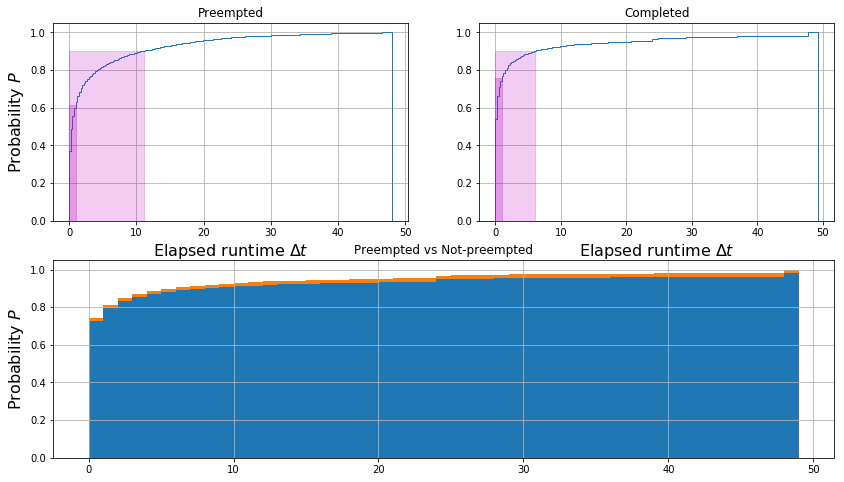

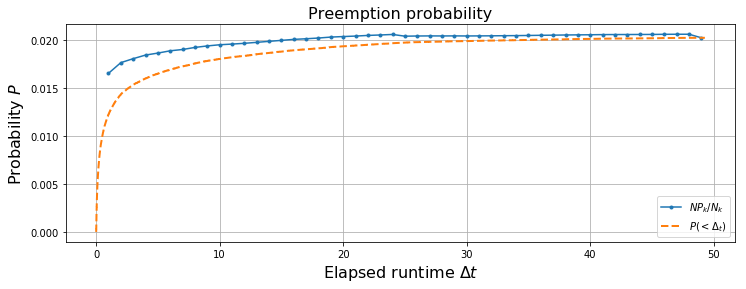

In [33]:
fg = plt.figure(figsize=(14,8))
ax1 = fg.add_subplot('221')
ax2 = fg.add_subplot('222')
ax3 = fg.add_subplot('212')
#
ax1.set_ylabel('Probability $P$', size=16)
ax3.set_ylabel('Probability $P$', size=16)
ax1.set_xlabel('Elapsed runtime $\Delta t$', size=16)
ax2.set_xlabel('Elapsed runtime $\Delta t$', size=16)
#
hhs=[]

for nm, dta,ax in [("Preempted", preempted, ax1), ("Completed", compl, ax2)]:
    hh = ax.hist(dta['Elapsed']*24., bins=200, cumulative=True,
                  density=True, zorder=5, histtype='step')
    hhs+=[hh]
    #
    y_90=.9*numpy.max(hh[0])
    k_90=numpy.searchsorted(hh[0], y_90)
    #x_90 = .5*(hh[1][k_90]+hh[1][k_90+1])
    x_90 = numpy.mean(hh[1][k_90:k_90+2])
    ax.fill_between([0., x_90], [0.,0.], y_90, color='m', alpha=.2, zorder=11)
    #
    # 1 hour:
    dt=1.
    k1h = numpy.searchsorted(hh[1], dt)
    y1h = numpy.mean(hh[0][k1h-2:k1h])
    ax.fill_between([0., 1.], 0., y1h, color='m', alpha=.25, zorder=10 )

    ax.grid()
    ax.set_title("{}".format(nm))
    #
    print('{}: t_90: {}'.format(nm, x_90))
    print('{}: P(1hr): {}'.format(nm, y1h/numpy.max(hh[0])))
    #
print('** N_completed: {}'.format(len(compl)))
print('** N_pr: {}'.format(len(preempted)))
#
print('** P(re): ', len(preempted)/(len(preempted)+len(compl)))
#
# TODO: total probability distribution of preemption. so basically we want to add the cumulative histograms
#. of preempted and completed.To do that, we have to interpolate the two sets on to the same x-axis.
# a quick estimator is to just multiply by P(preempt).
#ax3.plot()
#print('** ', type(hh[0]))
max_bin = numpy.max([numpy.max(preempted['Elapsed']), numpy.max(compl['Elapsed'])])*24
print('*** ', max_bin)
bins = numpy.arange(0., max_bin,1.)
hhh = ax3.hist([compl['Elapsed']*24., preempted['Elapsed']*24.], bins=bins,
              histtype='barstacked', density=True, log=False, cumulative=True,
               bottom=0.0*numpy.ones(-1+len(bins)))
ax3.grid()
ax3.set_title('Preempted vs Not-preempted')
#
print('** ** ', numpy.shape(hhh[0]))
# note: if we're using the "barstacked" histogram, the second series is S2 = s1+s2.
#
P_pr=1.- (hhh[0][0]/hhh[0][1])
#
fg2=plt.figure(figsize=(12,4))
ax4 = fg2.add_subplot('111')
ax4.set_title('Preemption probability', size=16)
ax4.set_ylabel('Probability $P$', size=16)
ax4.set_xlabel('Elapsed runtime $\Delta t$', size=16)

#ax4a = ax4.twinx()
#
ax4.plot(hhh[1][1:], P_pr, ls='-', marker='.', label='$NP_k/N_k$')
# ax4.plot(bins[1:], hhh[0][0])
# ax4a.plot(bins[1:], hhh[0][1])
ax4.grid()
#
# let's just build this cum-prob manually:
dt_Np = numpy.zeros( (len(sacct_mazama.jobs_summary),2))
#for t,s in sacct_mazama.jobs_summary[numpy.argsort(sacct_mazama.jobs_summary['Elapsed'])]:
#    it s=='PREEMPTED'

ix_s = numpy.argsort(sacct_mazama.jobs_summary['Elapsed'])
dt_Np[:,0] = sacct_mazama.jobs_summary['Elapsed'][ix_s]
dt_Np[:,1] = numpy.cumsum((sacct_mazama.jobs_summary['State'][ix_s]=='PREEMPTED').astype(int))
#
# /float(len(dt_Np))
ax4.plot(dt_Np[:,0]*24., dt_Np[:,1]/float(len(dt_Np)), ls='--', lw=2., label='$P(<\Delta_t)$')
#
# the hist and just counting cumulative measures match, if they're not normalized. just using the top
# of the stacked histogram doesnot seem to work quite right... because they are slightly different measures
# of the probability of PreEmption. gotta think about that a bit...
#hh = ax4.hist(preempted['Elapsed']*24., bins=100, cumulative=True,
#                  density=False, zorder=5, histtype='step')
ax4.legend(loc=0)
#
print('*** ***')
print(hhh[0][0][0:20])
print(hhh[0][1][0:20])